## Set up Colab environment

In [ ]:
!git clone https://github.com/iechevarria/lego-face-VAE

Cloning into 'lego-face-VAE'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 115 (delta 22), reused 26 (delta 8), pack-reused 59
Receiving objects: 100% (115/115), 42.93 MiB | 29.00 MiB/s, done.
Resolving deltas: 100% (38/38), done.


In [ ]:
cd lego-face-VAE

/content/lego-face-VAE/lego-face-VAE


In [2]:
!unzip dataset.zip

Archive:  dataset.zip
   creating: dataset/
  inflating: dataset/pixil-frame-0 (20).png  
   creating: __MACOSX/
   creating: __MACOSX/dataset/
  inflating: __MACOSX/dataset/._pixil-frame-0 (20).png  
  inflating: dataset/pixil-frame-0 (7).png  
  inflating: __MACOSX/dataset/._pixil-frame-0 (7).png  
  inflating: dataset/pixil-frame-0 (36).png  
  inflating: __MACOSX/dataset/._pixil-frame-0 (36).png  
  inflating: dataset/pixil-frame-0 (16).png  
  inflating: __MACOSX/dataset/._pixil-frame-0 (16).png  
  inflating: dataset/pixil-frame-0 (17).png  
  inflating: __MACOSX/dataset/._pixil-frame-0 (17).png  
  inflating: dataset/pixil-frame-0 (6).png  
  inflating: __MACOSX/dataset/._pixil-frame-0 (6).png  
  inflating: dataset/pixil-frame-0 (37).png  
  inflating: __MACOSX/dataset/._pixil-frame-0 (37).png  
  inflating: dataset/pixil-frame-0 (21).png  
  inflating: __MACOSX/dataset/._pixil-frame-0 (21).png  
  inflating: dataset/pixil-frame-0 (10).png  
  inflating: __MACOSX/dataset/._pixi

## Sanity test: run the VAE model on MNIST

In [6]:
from ml.utils import load_mnist
from ml.variational_autoencoder import VariationalAutoencoder

ModuleNotFoundError: No module named 'moviepy'

In [5]:
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

In [ ]:
(x_train, _), (x_test, _) = load_mnist()

In [ ]:
encoder_params = [
    {"filters": 32, "kernel_size": 3, "strides": 1},
    {"filters": 64, "kernel_size": 3, "strides": 2},
    {"filters": 64, "kernel_size": 3, "strides": 2},
    {"filters": 64, "kernel_size": 3, "strides": 1},
]

decoder_params = [
    {"filters": 64, "kernel_size": 3, "strides": 1},
    {"filters": 64, "kernel_size": 3, "strides": 2},
    {"filters": 32, "kernel_size": 3, "strides": 2},
    {"filters": 1, "kernel_size": 3, "strides": 1},
]

vae = VariationalAutoencoder(
    input_dim = (28,28,1),
    latent_dim = 8,
    encoder_params=encoder_params,
    decoder_params=decoder_params,
)

vae.save()

In [ ]:
LEARNING_RATE = 0.0005
BATCH_SIZE = 32

In [ ]:
vae.compile_model(lr=LEARNING_RATE, r_loss_factor=1000)

In [ ]:
vae.train(
    x_train,
    batch_size=BATCH_SIZE,
    epochs=200
)

Train on 60000 samples
Epoch 1/200
59904/60000 [============================>.] - ETA: 0s - loss: 44.8969 - vae_r_loss: 34.5169 - vae_kl_loss: 10.3800
Epoch 00001: saving model to model_output/weights.h5
60000/60000 [==============================] - 30s 494us/sample - loss: 44.8896 - vae_r_loss: 34.5084 - vae_kl_loss: 10.3813
Epoch 2/200
30656/60000 [==============>...............] - ETA: 14s - loss: 38.3275 - vae_r_loss: 27.1879 - vae_kl_loss: 11.1396

KeyboardInterrupt: ignored

In [ ]:
plot_reconstructed_images(data=x_test, encoder=vae.encoder_model, decoder=vae.decoder_model)

In [ ]:
## Train VAE on Lego faces

In [3]:
import numpy as np

from ml.utils import load_lego_faces, load_model, generate_morph_images, plot_reconstructed_images ##guessing morph_images is generate_morph_images
from ml.variational_autoencoder import VariationalAutoencoder

ModuleNotFoundError: No module named 'moviepy'

In [ ]:
lego_face_dict = load_lego_faces(size=64)
lego_faces = np.array(list(lego_face_dict.values()))

In [ ]:
encoder_params = [
    {"filters": 64, "kernel_size": 3, "strides": 1},
    {"filters": 64, "kernel_size": 3, "strides": 2},
    {"filters": 64, "kernel_size": 3, "strides": 2},
    {"filters": 64, "kernel_size": 3, "strides": 2},
    {"filters": 64, "kernel_size": 3, "strides": 1},
]

decoder_params = [
    {"filters": 64, "kernel_size": 3, "strides": 1},
    {"filters": 64, "kernel_size": 3, "strides": 2},
    {"filters": 64, "kernel_size": 3, "strides": 2},
    {"filters": 32, "kernel_size": 3, "strides": 2},
    {"filters": 3, "kernel_size": 3, "strides": 1},
]

vae = VariationalAutoencoder(
    input_dim = (64, 64, 3),
    latent_dim = 200,
    encoder_params=encoder_params,
    decoder_params=decoder_params,
)

vae.save()

In [ ]:
LEARNING_RATE = 0.0005
BATCH_SIZE = 32

In [ ]:
vae.compile_model(lr=LEARNING_RATE, r_loss_factor=10000)

In [ ]:
vae.train(
    lego_faces,
    batch_size=BATCH_SIZE,
    epochs=200
)

Train on 2574 samples
Epoch 1/200
2574/2574 [==============================] - ETA: 0s - loss: 548.1649 - vae_r_loss: 480.2290 - vae_kl_loss: 67.9360
Epoch 00001: saving model to model_output/weights.h5
2574/2574 [==============================] - 4s 2ms/sample - loss: 548.1649 - vae_r_loss: 480.2290 - vae_kl_loss: 67.9360
Epoch 2/200
2574/2574 [==============================] - ETA: 0s - loss: 279.5637 - vae_r_loss: 227.9818 - vae_kl_loss: 51.5819
Epoch 00002: saving model to model_output/weights.h5
2574/2574 [==============================] - 3s 1ms/sample - loss: 279.5637 - vae_r_loss: 227.9818 - vae_kl_loss: 51.5819
Epoch 3/200
2574/2574 [==============================] - ETA: 0s - loss: 254.5867 - vae_r_loss: 204.5366 - vae_kl_loss: 50.0500
Epoch 00003: saving model to model_output/weights.h5
2574/2574 [==============================] - 3s 1ms/sample - loss: 254.5867 - vae_r_loss: 204.5366 - vae_kl_loss: 50.0500
Epoch 4/200
2574/2574 [==============================] - ETA: 0s - lo

## Do the fun stuff with the VAE

In [ ]:
import numpy as np
from ml.utils import (
    animate_morph_images,
    load_lego_faces,
    load_model,
    plot_morph_images,
    plot_random_faces,
    plot_reconstructed_images,
)

vae = load_model(path='trained_model')

lego_face_dict = load_lego_faces(size=64)
filenames, lego_faces = zip(*lego_face_dict.items())
lego_faces = np.array(list(lego_faces))

common_kwargs = {
    'encoder': vae.encoder_model,
    'decoder': vae.decoder_model,
}

### Reconstruct faces

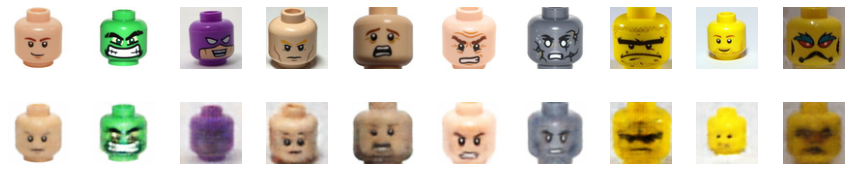

In [ ]:
plot_reconstructed_images(data=lego_faces, **common_kwargs)

### Generate new faces

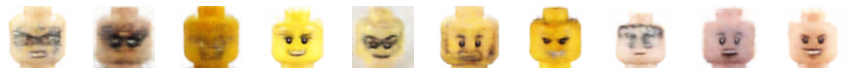

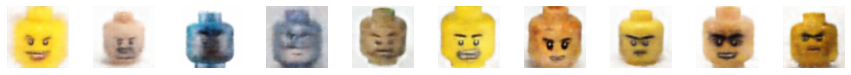

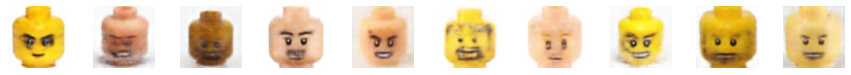

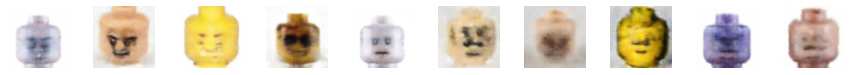

In [ ]:
plot_random_faces(vae.decoder_model)
plot_random_faces(vae.decoder_model)
plot_random_faces(vae.decoder_model)
plot_random_faces(vae.decoder_model)

### Do face morphs

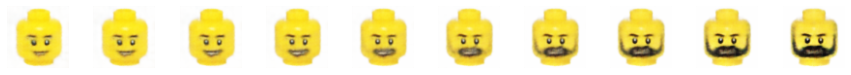

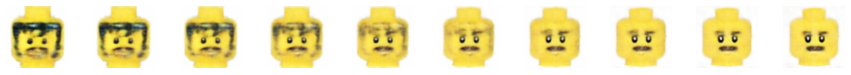

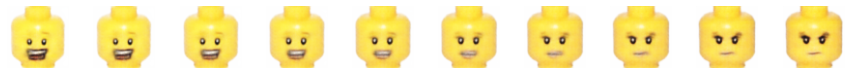

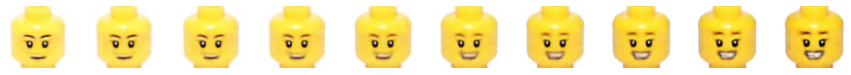

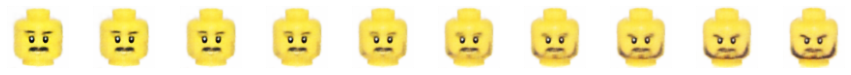

In [ ]:
pairs = [
    ('3626cpb1221.jpg', '3626cpb1495.jpg'),
    ('3626bpx121.jpg', '3626cpb1484.jpg'),
    ('3626cpb1591_0.jpg', '3626cpb2271_1.jpg'),
    ('3626cpb1398_0.jpg', '3626cpb2380_0.jpg'),
    ('3626cpb1484.jpg', '3626cpb0978.jpg'),
]

for f1, f2 in pairs:
    plot_morph_images(
        lego_face_dict[f1], 
        lego_face_dict[f2],
        **common_kwargs,
    )

In [ ]:
f1, f2 = pairs[3]
clip = animate_morph_images(
    lego_face_dict[f1], 
    lego_face_dict[f2],
    n_steps=90,
    **common_kwargs,
)
clip.ipython_display(width=400)

### Make t-SNE plots

In [ ]:
encodings = np.asarray(vae.encoder_model.predict(lego_faces), dtype=np.float64)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

enc_50d = PCA(n_components=50).fit_transform(encodings)
tsne_coords = TSNE(n_components=2).fit_transform(enc_50d)

In [ ]:
from os.path import join
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

offset = 0
num_to_show = 4000

x_coords, y_coords = list(zip(*tsne_coords[offset:offset + num_to_show]))
relevant_files = filenames[offset:offset + num_to_show]

fig, ax = plt.subplots(figsize=(50, 50))
ax.axis('off')
ax.set_xlim(-50, 50)
ax.set_ylim(-50, 50)

i = 0
for x, y, filename in zip(x_coords, y_coords, relevant_files):
    ab = AnnotationBbox(
        OffsetImage(plt.imread(join('dataset', filename)), zoom=0.2),
        xy=(x, y),
        frameon=False,
    )
    ax.add_artist(ab)
    i += 1

plt.show()